## DARWIN SiPM simulation## 

In [1]:
#
# import the SiPM classes
#
from SiPM import *
# for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Define general geometry parameters ###

In [2]:
# z position of the in-plane SiPMs
z_plane = 10
# radius of the cyinder for SiPMs at the side
r_cylinder = 22
# radius of a SiPM - I assume circular SiPMs with a radius to make the area correspond to a 3x3mm2 square.
r_sipm = 1.6925
# make an instant of the geometry class
geo = GeoParameters(z_plane=z_plane, r_cylinder=r_cylinder, r_sipm=r_sipm)

### Define the geometry of the silicon PMs ###

Add the SiPMs to the geometry

In [3]:
inch = 25.4 # mm
    
sipm = SiPM(type="plane",position=[  0.0,-15.0,z_plane],qeff=1)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[-13.0, -7.5,z_plane],qeff=1)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[+13.0, -7.5,z_plane],qeff=1)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[ -4.0,  0.0,z_plane],qeff=1)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[ +4.0,  0.0,z_plane],qeff=1)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[-13.0, +7.5,z_plane],qeff=1)
geo.add_sipm(sipm)
sipm = SiPM(type="plane",position=[+13.0, +7.5,z_plane],qeff=1)
geo.add_sipm(sipm)

### Simulate the SiPM acceptance ###

* uv_position is the position where the UV photons are generated
* n_mc is the number of MC photons

In [4]:
#sim = Simulator(geo=geo,uv_position=[30.4,37.6,0],n_mc=100000)
x0 = [ 3,-8, 0.]
sim = Simulator(geo=geo,uv_position=x0,n_mc=100000)

sim.generate_events()

generated  0  events
Number of SiPMs =  7  Generated hits from x= [ 3. -8.  0.]
 0  (x,y,z) = ( 0.0, -15.0, 10.0) p(hit) = 0.00411  qe = 1.000
 1  (x,y,z) = (-13.0, -7.5, 10.0) p(hit) = 0.00100  qe = 1.000
 2  (x,y,z) = (13.0, -7.5, 10.0) p(hit) = 0.00229  qe = 1.000
 3  (x,y,z) = (-4.0,  0.0, 10.0) p(hit) = 0.00230  qe = 1.000
 4  (x,y,z) = ( 4.0,  0.0, 10.0) p(hit) = 0.00360  qe = 1.000
 5  (x,y,z) = (-13.0,  7.5, 10.0) p(hit) = 0.00040  qe = 1.000
 6  (x,y,z) = (13.0,  7.5, 10.0) p(hit) = 0.00071  qe = 1.000
event generation done


### Emulate events and reconstruct the position ###

* n_event = number of events to emulate
* n_uv = number of UV photons assumed for the S2 signal

In [13]:
%load_ext snakeviz

In [15]:
%%snakeviz
rec = Reconstruction(sim=sim, alpha0=0.0)
df = rec.emulate_events(n_uv=50000,n_event=10000,n_min=0,method="LINEAR",plot=False,nbins=100,range=((-20.,20.),(-20.,20.)))

generated  0  events
generated  100  events
generated  200  events
generated  300  events
generated  400  events
generated  500  events
generated  600  events
generated  700  events
generated  800  events
generated  900  events
generated  1000  events
generated  1100  events
generated  1200  events
generated  1300  events
generated  1400  events
generated  1500  events
generated  1600  events
generated  1700  events
generated  1800  events
generated  1900  events
generated  2000  events
generated  2100  events
generated  2200  events
generated  2300  events
generated  2400  events
generated  2500  events
generated  2600  events
generated  2700  events
generated  2800  events
generated  2900  events
generated  3000  events
generated  3100  events
generated  3200  events
generated  3300  events
generated  3400  events
generated  3500  events
generated  3600  events
generated  3700  events
generated  3800  events
generated  3900  events
generated  4000  events
generated  4100  events
gene

# Plots from here ...... ###

1D distribution of reconstructed x and y position

N entry: 1000
<xr> =  2.68981815888765  +/- 0.012123607428122284  mm
    rms_x =  0.38338212930602517  mm
<yr> =  -8.307882906726121  +/- 0.011177472479261234  mm
    rms_y =  0.3534627151831467  mm


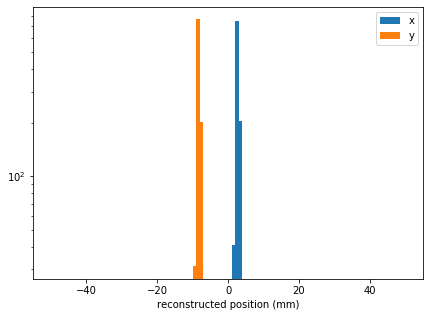

In [7]:
a = rec.plot(type="res",bins=100,range=(-50,50))
plt.yscale('log')

2D distribution of y as a function of x

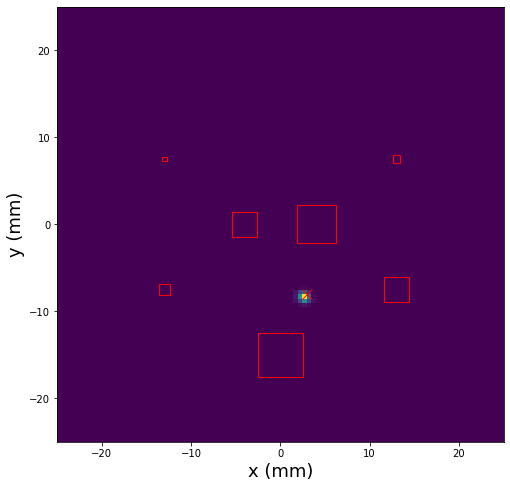

In [8]:
inch = 25.4
ax = rec.plot(type="xy",range=((-25,25),(-25,25)))
#ax = rec.plot(type="xy",range=((-10,10),(40,60)))
plt.plot([x0[0]],[x0[1]],marker='x',color='red',markersize=10)

Distribution of reconstructed UV intensity

 N(UV) reco =  51154.04326503903  +/- 63.55142501212253


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  


(0.1, 1000.0)

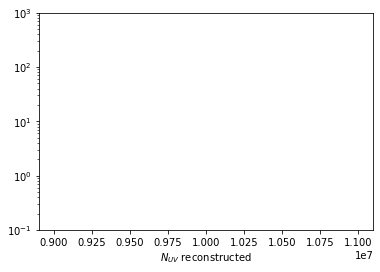

In [9]:
rec.plot(type="intensity",range=(9000000,11000000))
plt.yscale('log')
plt.ylim([0.1,1e3])

In [12]:
rec.plot(type="r0")

TypeError: 'NoneType' object is not callable